In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction")

Skipping, found downloaded files in "./mobile-price-prediction" (use force=True to force download)


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/mobile-price-prediction/Cellphone.csv")

In [ ]:
df.head(10)

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
5,947,2137,12,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
6,774,1238,13,134.1,4.0,233,2,1.20,8.0,1.000,2.00,0.0,1560,11.7
7,947,2137,13,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
8,99,1315,14,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
9,1103,2580,15,145.0,5.1,432,4,2.50,16.0,2.000,16.00,2.0,2800,8.1


In [ ]:
df.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [ ]:
df.dtypes

,0
Product_id,int64
Price,int64
Sale,int64
weight,float64
resoloution,float64
ppi,int64
cpu core,int64
cpu freq,float64
internal mem,float64
ram,float64


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()

,0
Product_id,0
Price,0
Sale,0
weight,0
resoloution,0
ppi,0
cpu core,0
cpu freq,0
internal mem,0
ram,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

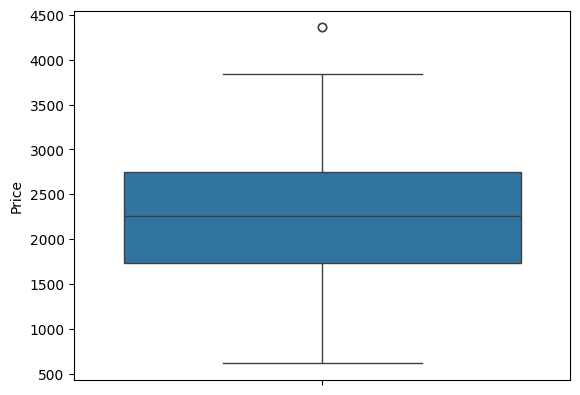

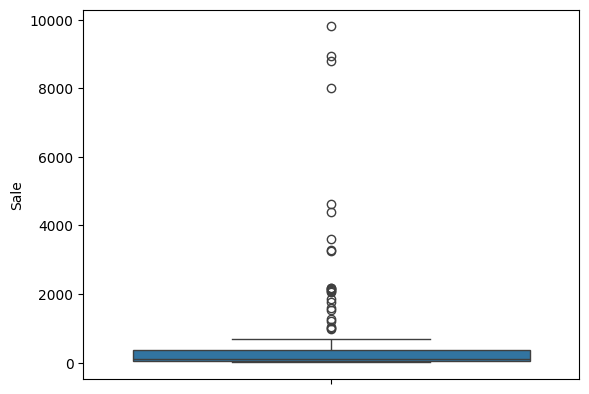

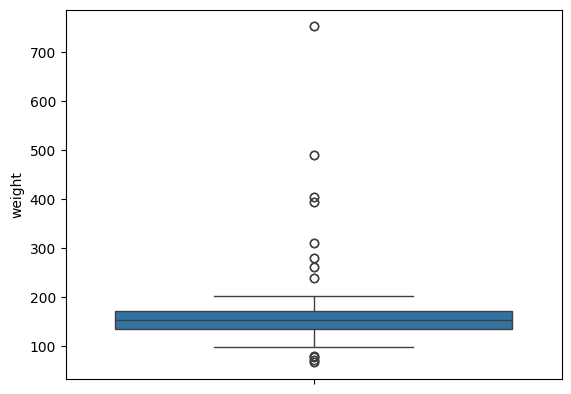

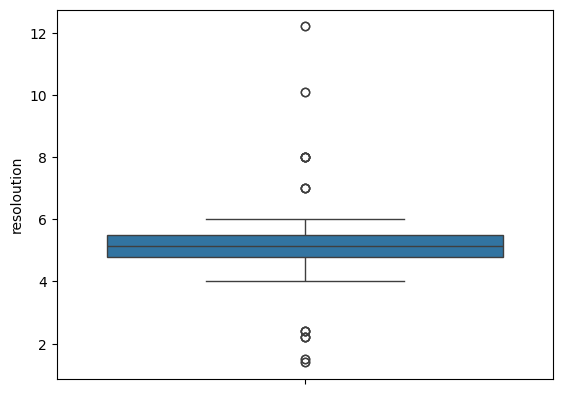

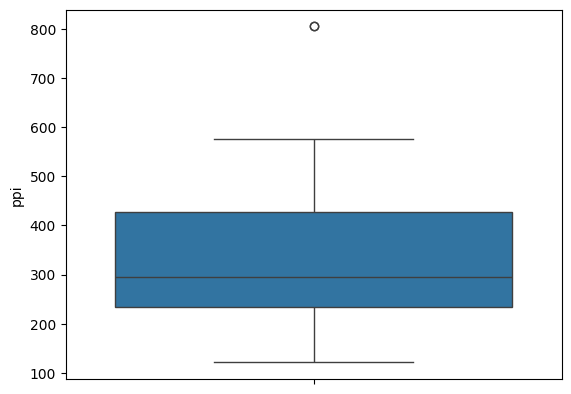

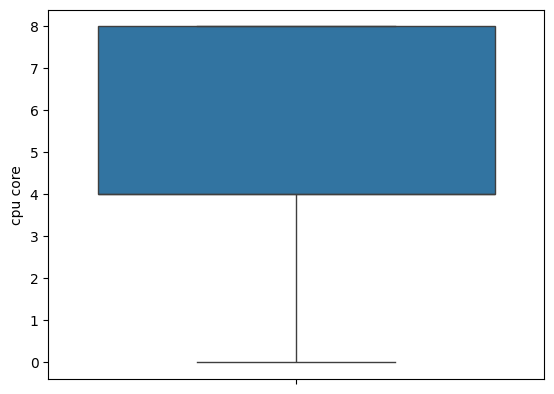

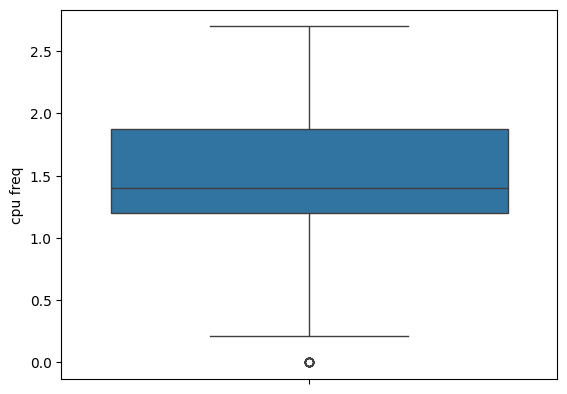

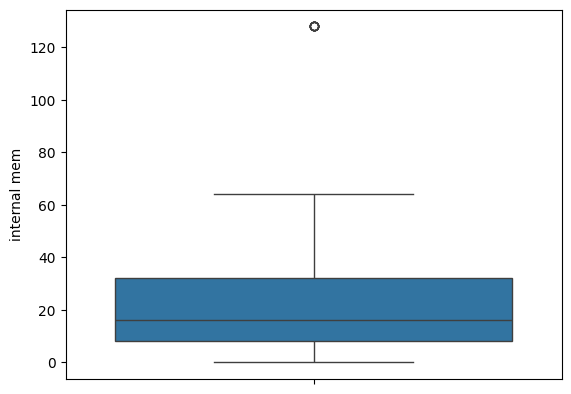

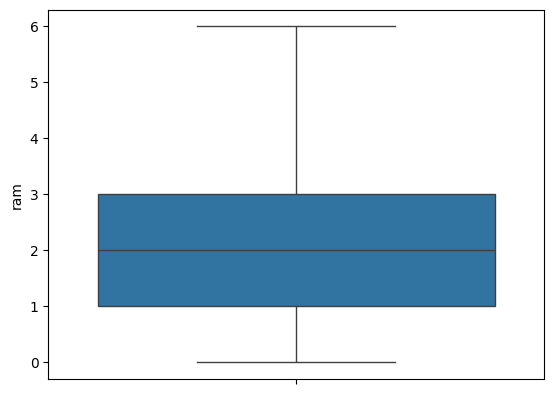

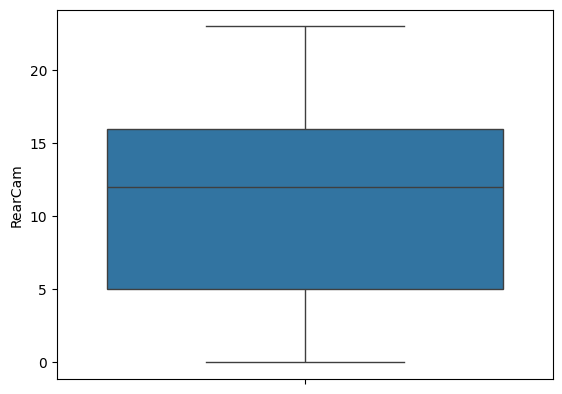

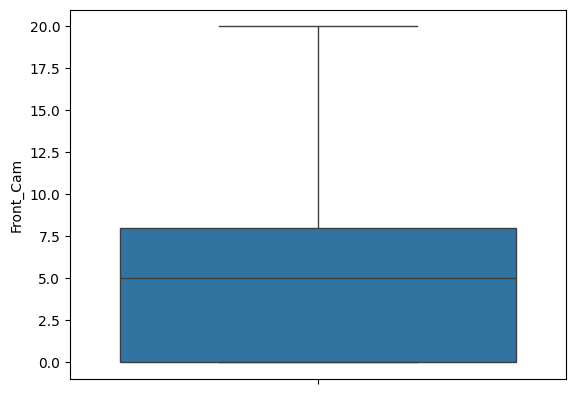

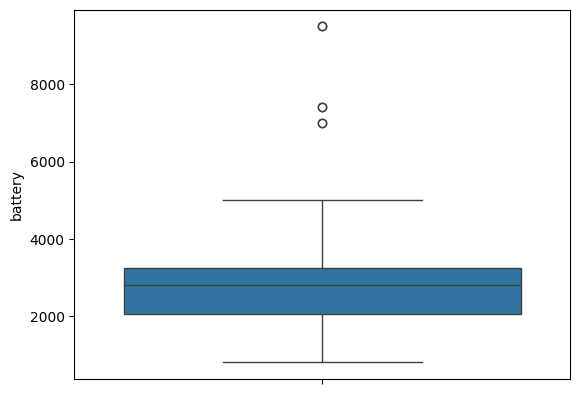

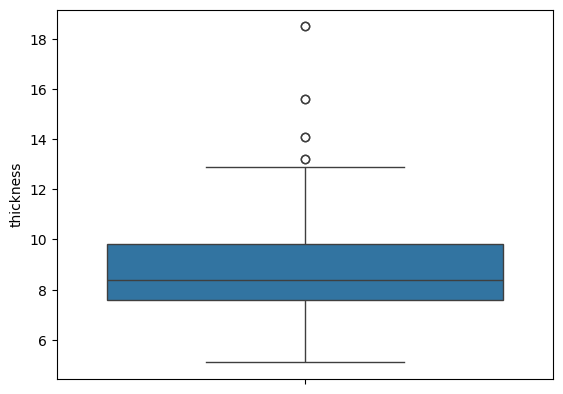

In [ ]:
numerical_cols = ['Price', 'Sale', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness']

def check_outliers(df, numerical_cols):
    for col in numerical_cols:
        sns.boxplot(df[col])
        plt.show()

check_outliers(df, numerical_cols)

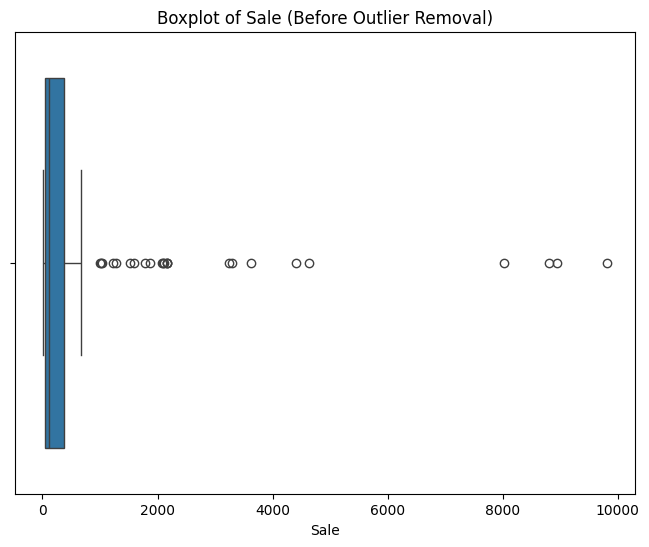

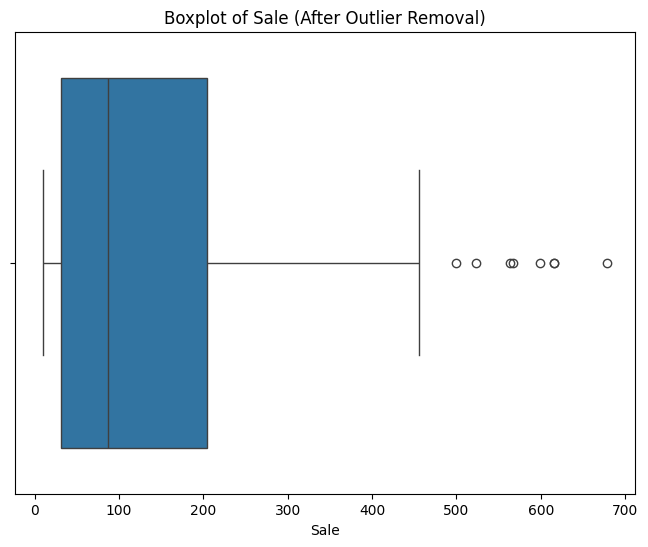

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

feature = 'Sale'

plt.figure(figsize=(8, 6))
sns.boxplot(x=df[feature])
plt.title(f'Boxplot of {feature} (Before Outlier Removal)')
plt.xlabel(feature)
plt.show()

Q1 = df[feature].quantile(0.30)
Q3 = df[feature].quantile(0.70)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_filtered = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]


plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtered[feature])
plt.title(f'Boxplot of {feature} (After Outlier Removal)')
plt.xlabel(feature)
plt.show()

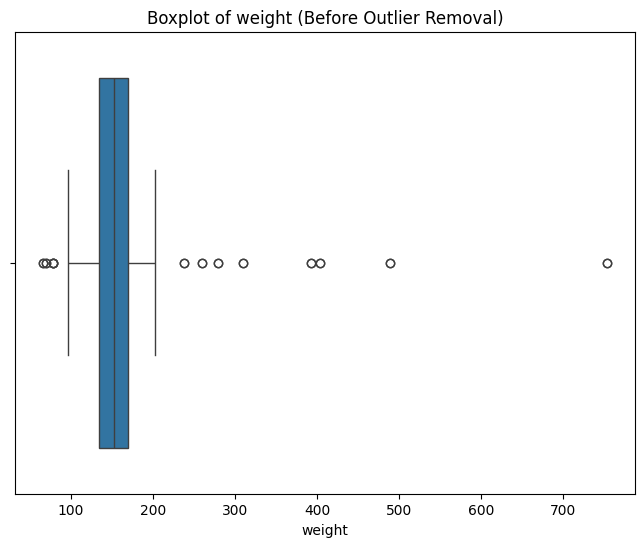

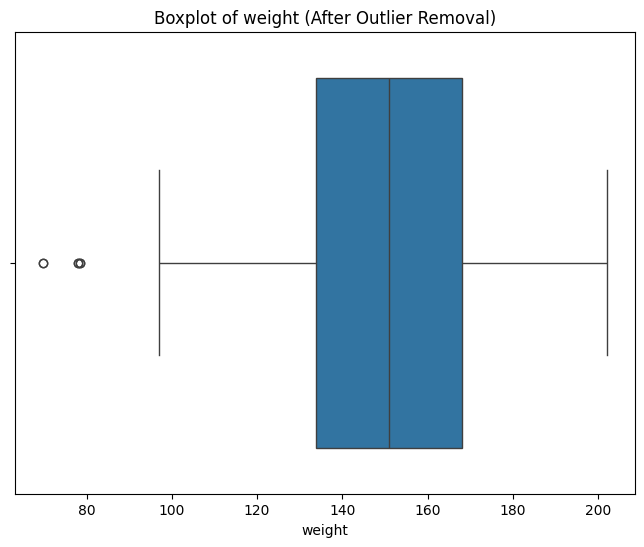

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


feature = 'weight'

plt.figure(figsize=(8, 6))
sns.boxplot(x=df[feature])
plt.title(f'Boxplot of {feature} (Before Outlier Removal)')
plt.xlabel(feature)
plt.show()


Q1 = df[feature].quantile(0.22)
Q3 = df[feature].quantile(0.78)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]


plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtered[feature])
plt.title(f'Boxplot of {feature} (After Outlier Removal)')
plt.xlabel(feature)
plt.show()

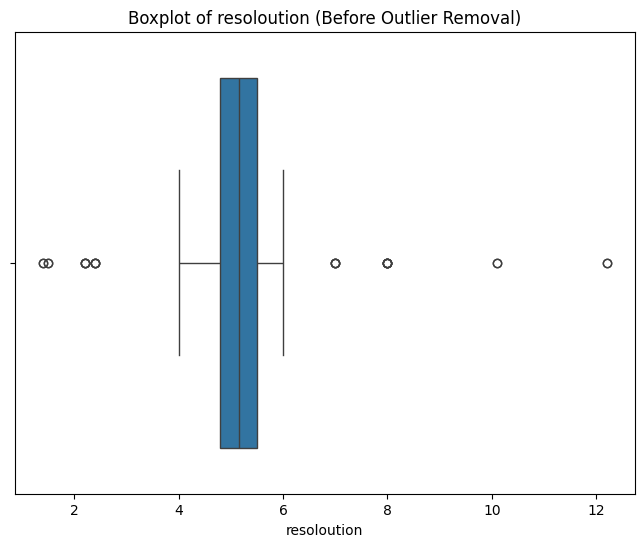

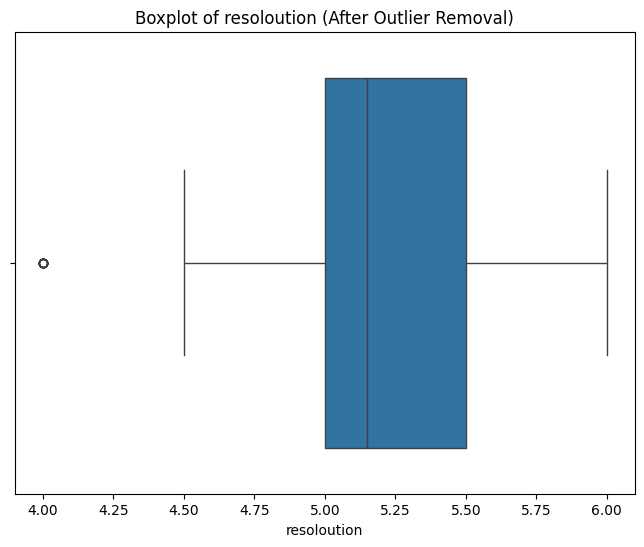

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


feature = 'resoloution'


plt.figure(figsize=(8, 6))
sns.boxplot(x=df[feature])
plt.title(f'Boxplot of {feature} (Before Outlier Removal)')
plt.xlabel(feature)
plt.show()


Q1 = df[feature].quantile(0.22)
Q3 = df[feature].quantile(0.78)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_filtered = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]


plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtered[feature])
plt.title(f'Boxplot of {feature} (After Outlier Removal)')
plt.xlabel(feature)
plt.show()

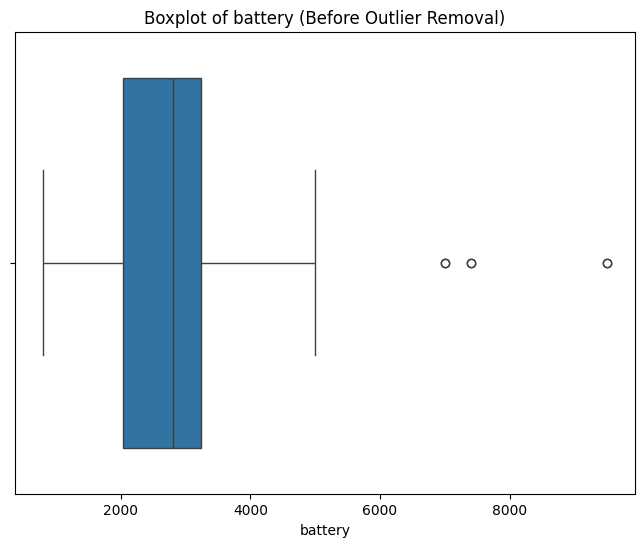

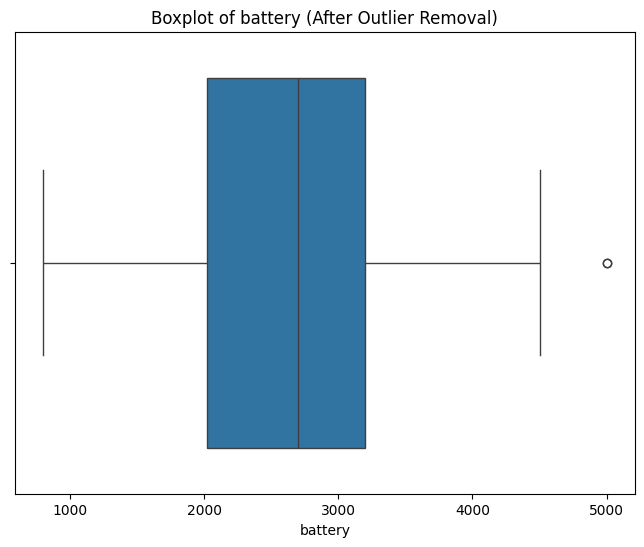

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


feature = 'battery'


plt.figure(figsize=(8, 6))
sns.boxplot(x=df[feature])
plt.title(f'Boxplot of {feature} (Before Outlier Removal)')
plt.xlabel(feature)
plt.show()


Q1 = df[feature].quantile(0.22)
Q3 = df[feature].quantile(0.78)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_filtered = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]


plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtered[feature])
plt.title(f'Boxplot of {feature} (After Outlier Removal)')
plt.xlabel(feature)
plt.show()

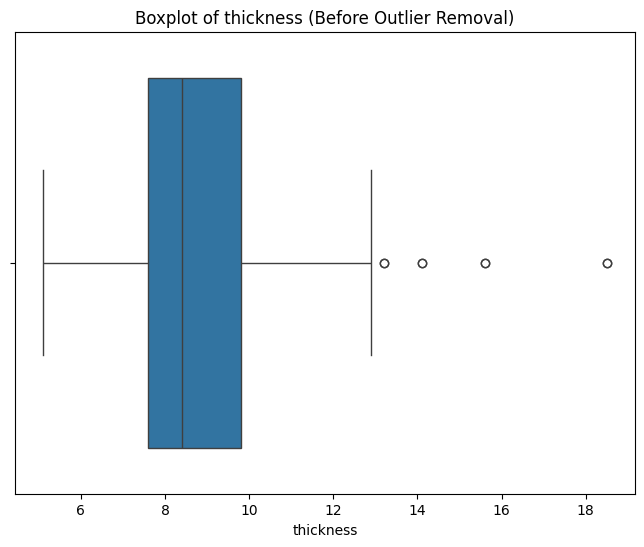

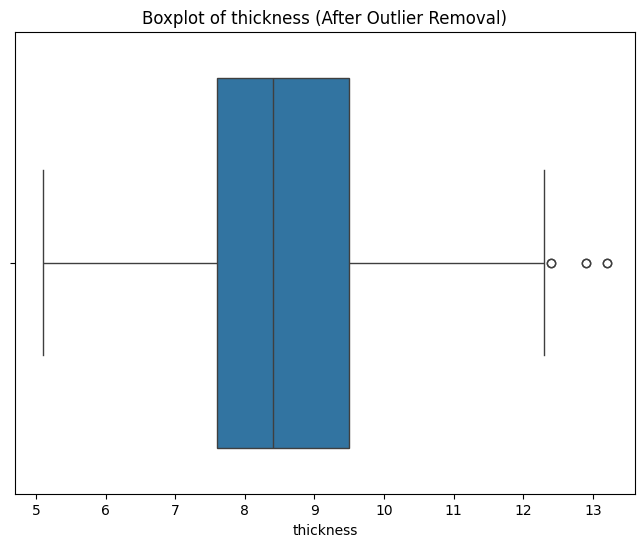

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


feature = 'thickness'


plt.figure(figsize=(8, 6))
sns.boxplot(x=df[feature])
plt.title(f'Boxplot of {feature} (Before Outlier Removal)')
plt.xlabel(feature)
plt.show()


Q1 = df[feature].quantile(0.22)
Q3 = df[feature].quantile(0.78)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_filtered = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]


plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtered[feature])
plt.title(f'Boxplot of {feature} (After Outlier Removal)')
plt.xlabel(feature)
plt.show()

In [ ]:
df_filtered.shape

(155, 14)

In [ ]:
df.shape

(161, 14)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# df_scaled=scaler.fit_transform(df_filtered)

In [ ]:
df_filtered.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [ ]:
df_filtered.drop("Product_id",axis=1,inplace=True)

<ipython-input-276-5af1e700f444>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop("Product_id",axis=1,inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_filtered)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(df_scaled,df_filtered["Price"],test_size=0.2,random_state=42)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 4.336027404511838e-25
R-squared: 1.0


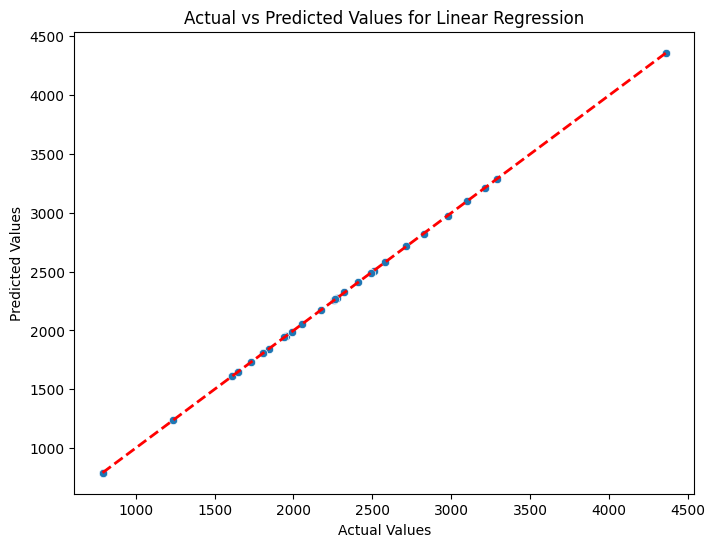

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values for Linear Regression")
plt.show()